# Fisher's answers for Problem Set 3

In [1]:
!pip install --upgrade pip
!pip install pandas-datareader
import pandas_datareader as pdr
import pandas as pd
import datetime

In [2]:
# Take care of the preliminary collection of the data.

from fredapi import Fred
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
import statsmodels.api as sm
import numpy as np
import pandas as pd  #need Pandas for pretty tables
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# syntax for Panda data reader
#df = pdr.DataReader('PAYEMS', 'GDPC1', start, end)

#This data was chosen because it is the beginning of recorded unemployment
start = datetime.datetime (1948, 1, 1)
end = datetime.datetime (2023, 10, 1)

var_names=['GDPC1','PCECC96','GPDIC1','GCEC1','GDP','NETEXP','PCDG','DDURRG3Q086SBEA']
df_GDP = pdr.DataReader(var_names,'fred',start,end)

df_GDP["Durables"]=df_GDP["PCDG"]/df_GDP["DDURRG3Q086SBEA"] #deflate nominal series
df_GDP["Net exports"]=df_GDP["NETEXP"]/df_GDP['GDP'] #as a share of GDP

  
#Here are a bunch of lines of old code

#GDP = fred.get_series('GDPC1') #Real Y
#C = fred.get_series('PCECC96') #Real C
#I = fred.get_series('GPDIC1')  #Real I
#G = fred.get_series('GCEC1')   #Real G
#Net_X = fred.get_series('NETEXP') #nominal net exports, starts in 1946
#Nom_GDP= fred.get_series('GDP') #nominal GDP, starts in 1946
#con_dur = fred.get_series('PCDG') #nominal series
#con_dur_PI = fred.get_series('DDURRG3Q086SBEA') # price index for nominal consumer durables


var_names=['UNRATE']  #monthly series!
df_urate = pdr.DataReader(var_names,'fred',start,end).resample('QS').first()/100

# need to replace the index because it displays end of period values when resampling.
# This code took me hours and hours to figure out.

#index = df_GDP.index
#df_urate.index=index

df_GDP["Unemployment"]=df_urate['UNRATE'] #put it into the bigger data frame


In [3]:
display(df_GDP)

,GDPC1,PCECC96,GPDIC1,GCEC1,GDP,NETEXP,PCDG,DDURRG3Q086SBEA,Durables,Net exports,Unemployment
DATE,,,,,,,,,,,
1948-01-01,2239.682,1385.667,268.012,563.895,265.742,7.293,23.547,53.756,0.438035,0.027444,0.034
1948-04-01,2276.690,1401.789,284.598,583.846,272.567,5.205,24.019,54.461,0.441031,0.019096,0.039
1948-07-01,2289.770,1403.859,287.514,596.087,279.196,4.949,25.277,56.356,0.448524,0.017726,0.036
1948-10-01,2292.364,1415.063,273.765,618.100,280.366,4.501,24.971,56.459,0.442286,0.016054,0.037
1949-01-01,2260.807,1417.353,232.885,634.547,275.034,6.478,24.436,56.269,0.434271,0.023553,0.043
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,21989.981,15171.391,4058.491,3714.800,26408.405,-877.204,2129.012,108.776,19.572442,-0.033217,0.036
2023-01-01,22112.329,15312.850,3963.689,3758.768,26813.601,-825.687,2194.859,108.533,20.222964,-0.030794,0.034
2023-04-01,22225.350,15343.553,4014.121,3789.786,27063.012,-806.093,2193.586,108.559,20.206395,-0.029786,0.034


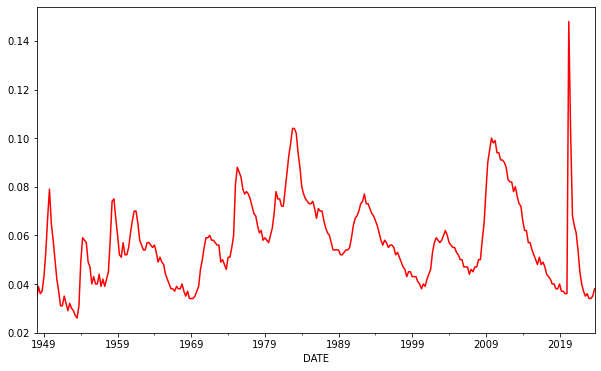

In [4]:
#Here's a picture of the quarterly unemployment rate.
# It's just a reality check.
# Don't worry; you will find a job, when you graduate.
plt.rcParams['figure.figsize'] = (10,6)
df_GDP["Unemployment"].plot(color='red')
plt.show()

In [5]:
# Now we filter the series

# Running the data through the Prescott filter

λ=1600

Y_cycle, Y_trend = sm.tsa.filters.hpfilter(np.log(df_GDP['GDPC1']), λ)
C_cycle, C_trend = sm.tsa.filters.hpfilter(np.log(df_GDP['PCECC96']), λ)
I_cycle, I_trend = sm.tsa.filters.hpfilter(np.log(df_GDP['GPDIC1']), λ)
G_cycle, G_trend = sm.tsa.filters.hpfilter(np.log(df_GDP['GCEC1']), λ)
X_cycle, X_trend = sm.tsa.filters.hpfilter(df_GDP['Net exports'], λ)
U_cycle, U_trend = sm.tsa.filters.hpfilter(df_GDP['Unemployment'], λ) 
durables_cycle, durables_trend = sm.tsa.filters.hpfilter(np.log(df_GDP['Durables']),λ)

# The next cell shows you how to export variables to an Excel file

In [6]:
df_GDP["Y_Cycle"]=Y_cycle
x=df_GDP.groupby(df_GDP.index.year)['Y_Cycle'].mean()
import pandas as pd
import openpyxl
x.to_excel('GDP2023.xlsx', sheet_name='Business cycle')

# A nice plot, with subplots

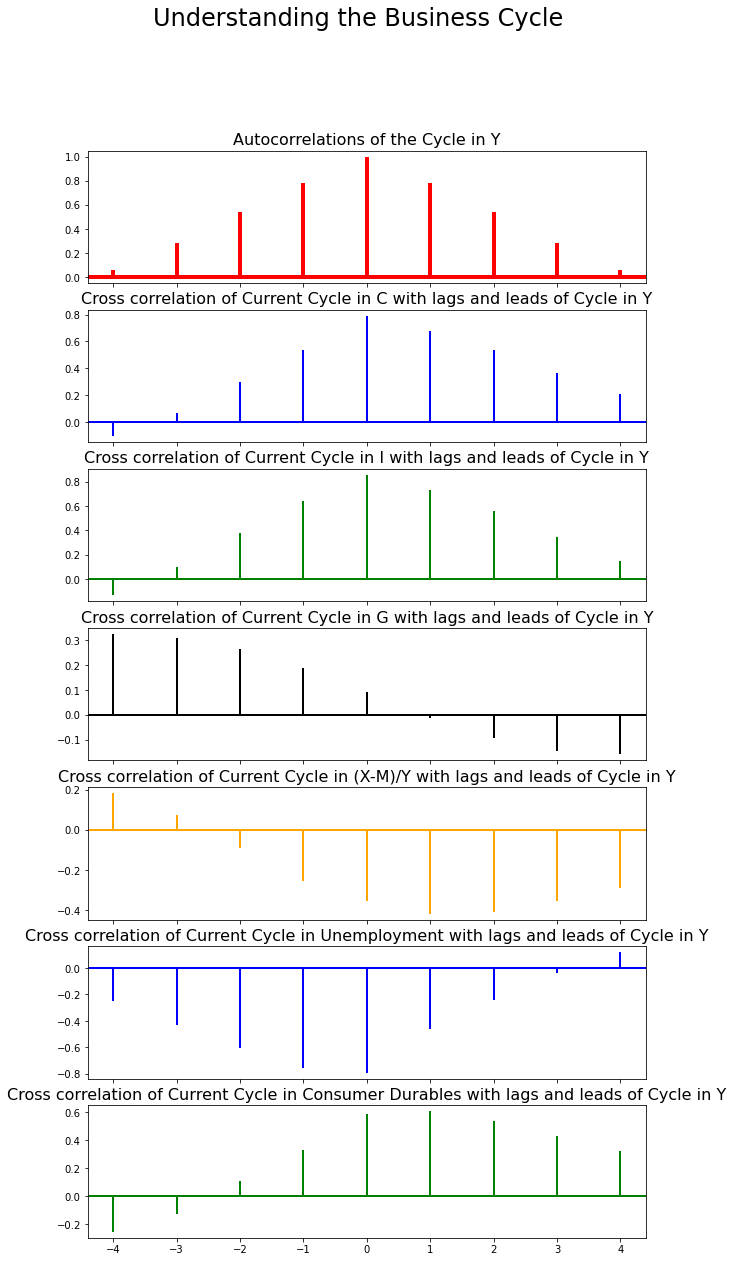

In [7]:
# Now we need the visual display of the necessary information

plt.rcParams['figure.figsize'] = (10,20)

fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7] = plt.subplots(7, 1, sharex=True)
fig.suptitle('Understanding the Business Cycle', fontsize=24)

#Y itself
ax1.acorr(Y_cycle, usevlines=True, normed=True, maxlags=4, lw=4, color='r')
ax1.set_title('Autocorrelations of the Cycle in Y', fontsize=16)

#Consumption
ax2.set_title('Cross correlation of Current Cycle in C with lags and leads of Cycle in Y', fontsize=16)
ax2.xcorr(Y_cycle, C_cycle, usevlines=True, maxlags=4, normed=True, lw=2, color='b')

#Investment
ax3.set_title('Cross correlation of Current Cycle in I with lags and leads of Cycle in Y', fontsize=16)
ax3.xcorr(Y_cycle, I_cycle, usevlines=True, maxlags=4, normed=True, lw=2, color='g')

#G
ax4.set_title('Cross correlation of Current Cycle in G with lags and leads of Cycle in Y', fontsize=16)
ax4.xcorr(Y_cycle, G_cycle, usevlines=True, maxlags=4, normed=True, lw=2, color='black')

#(X-M)/Y
ax5.set_title('Cross correlation of Current Cycle in (X-M)/Y with lags and leads of Cycle in Y', fontsize=16)
ax5.xcorr(Y_cycle, X_cycle, usevlines=True, maxlags=4, normed=True, lw=2,color='orange')

#Urate
ax6.set_title('Cross correlation of Current Cycle in Unemployment with lags and leads of Cycle in Y', fontsize=16)
ax6.xcorr(Y_cycle, U_cycle, usevlines=True, maxlags=4, normed=True, lw=2,color='blue')

#Durables
ax7.set_title('Cross correlation of Current Cycle in Consumer Durables with lags and leads of Cycle in Y', fontsize=16)
ax7.xcorr(Y_cycle, durables_cycle, usevlines=True, maxlags=4, normed=True, lw=2,color='green')


plt.show()

In [8]:
#Now I need to get the standard deviations of the different cyclical components:

names = [Y_cycle, C_cycle, I_cycle, G_cycle, X_cycle, U_cycle, durables_cycle]

stdev = [np.std(macrovar)for macrovar in names] #This is why Python is epic.  Look closely at this syntax!


In [9]:
# This block of code calculates the cross correlations, including the autocorrelation of Y with itself
# and its lags.  I couldn't find any code out there that I liked.
#The sample autocorrelations are not completely symmetric.  Is that a problem?

def cor(x,y,xlag):
    """
    This function computs cross correlations with leads and lags of x only
    I regret to say that I had to write this function to do the homework.
    It is essentially a bunch of code that carefully trims the data.
    """
    m=len(x) 
    n=len(y)
    if not isinstance(xlag,int):  #check that we are using integers for lags or leads of x
        return('The lag length is not an integer.')
    if m != n: #check that the series match
        return('The series do not have the same length.')
    
    if xlag==0: #special case with no trimming
        x1 = x
        y1 = y
        # The next statement is the defintion of correlation
        return np.corrcoef(x1,y1)[0,1] #upper right element of the correlation matrix
   
    if xlag > 0:
        x1 = x[:-xlag] #trim off the end
        y1 = y[xlag:]  #trim off the beginning
        return np.corrcoef(x1,y1)[0,1]
    
    if xlag < 0:
        x1 = x[-xlag:] #trim off the beginning
        y1 = y[:xlag]  #trim off the end
        return np.corrcoef(x1,y1)[0,1]
    
    #check if my code is really out to lunch
    return('Nothing happened')


In [10]:
# Now let Python do its magic

names = [Y_cycle, C_cycle, I_cycle, G_cycle, X_cycle, U_cycle, durables_cycle]
z = [4,3,2,1,0,-1,-2,-3,-4]  #Start with the lags, then do the leads!
y=[]
for xlags in z:
    y.append([cor(Y_cycle, macrovar, xlags)for macrovar in names]) #Isn't Python wonderful?


In [11]:
# This is how one sets up a dataframe

# First comes a dictionary
data = {'Standard deviation':  stdev, 'Y(-4)': y[0], 'Y(-3)': y[1], 'Y(-2)': y[2], 'Y(-1)': y[3], 'Y(0)': y[4],
        'Y(+1)': y[5], 'Y(+2)': y[6], 'Y(+3)': y[7], 'Y(+4)': y[8]}
        
# Now come the column names
df = pd.DataFrame (data, columns = ['Standard deviation','Y(-4)','Y(-3)','Y(-2)','Y(-1)','Y(0)','Y(+1)','Y(+2)','Y(+3)','Y(+4)'])
                                
# Change the row indexes to make them comprehensible
names = ['Y','C','I','G','(X-M)/Y', 'Unemployment rate', 'Consumer durables']
df.index = names
# Now put in a small touch to make the table look like that in Prescott on p.12
df.index.name = 'Macro Variable'
#check my work
print(df)

                   Standard deviation     Y(-4)     Y(-3)     Y(-2)     Y(-1)  \
Macro Variable                                                                  
Y                            0.016346  0.057642  0.282590  0.542622  0.783959   
C                            0.013777 -0.106207  0.069332  0.300118  0.535837   
I                            0.071062 -0.134147  0.101166  0.377946  0.642515   
G                            0.031046  0.325132  0.307603  0.263444  0.188042   
(X-M)/Y                      0.004080  0.183272  0.075459 -0.090051 -0.256804   
Unemployment rate            0.010416 -0.252017 -0.433868 -0.606418 -0.755631   
Consumer durables            0.047886 -0.256580 -0.125748  0.105787  0.330911   

                       Y(0)     Y(+1)     Y(+2)     Y(+3)     Y(+4)  
Macro Variable                                                       
Y                  1.000000  0.783959  0.542622  0.282590  0.057642  
C                  0.790914  0.680048  0.539318  0.369397  0

In [12]:
# I found this page on making nicely formatted dataframes
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
# I copied some stuff from them.

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.format(precision=3)\
  .applymap(color_negative_red)\
  .apply(highlight_max)

,Standard deviation,Y(-4),Y(-3),Y(-2),Y(-1),Y(0),Y(+1),Y(+2),Y(+3),Y(+4)
Macro Variable,,,,,,,,,,
Y,0.016,0.058,0.283,0.543,0.784,1.000,0.784,0.543,0.283,0.058
C,0.014,-0.106,0.069,0.300,0.536,0.791,0.680,0.539,0.369,0.208
I,0.071,-0.134,0.101,0.378,0.643,0.855,0.735,0.561,0.346,0.147
G,0.031,0.325,0.308,0.263,0.188,0.092,-0.013,-0.094,-0.147,-0.160
(X-M)/Y,0.004,0.183,0.075,-0.090,-0.257,-0.356,-0.419,-0.413,-0.361,-0.297
Unemployment rate,0.010,-0.252,-0.434,-0.606,-0.756,-0.792,-0.462,-0.241,-0.037,0.122
Consumer durables,0.048,-0.257,-0.126,0.106,0.331,0.589,0.608,0.536,0.432,0.323


# Now I will redo all this work, but I will omit the data after 2010.  Thus I will trim 52 observations from the end.

In [13]:
df_GDP2=df_GDP[df_GDP.index.year <=2010]

In [14]:
# Now we filter the series

# Running the data through the Prescott filter

λ=1600

Y_cycle, Y_trend = sm.tsa.filters.hpfilter(np.log(df_GDP2['GDPC1']), λ)
C_cycle, C_trend = sm.tsa.filters.hpfilter(np.log(df_GDP2['PCECC96']), λ)
I_cycle, I_trend = sm.tsa.filters.hpfilter(np.log(df_GDP2['GPDIC1']), λ)
G_cycle, G_trend = sm.tsa.filters.hpfilter(np.log(df_GDP2['GCEC1']), λ)
X_cycle, X_trend = sm.tsa.filters.hpfilter(df_GDP2['Net exports'], λ)
U_cycle, U_trend = sm.tsa.filters.hpfilter(df_GDP2['Unemployment'], λ) 
durables_cycle, durables_trend = sm.tsa.filters.hpfilter(np.log(df_GDP2['Durables']),λ)

In [15]:
#Now I need to get the standard deviations of the different cyclical components:

names = [Y_cycle, C_cycle, I_cycle, G_cycle, X_cycle, U_cycle, durables_cycle]

stdev = [np.std(macrovar)for macrovar in names] #This is why Python is epic.  Look closely at this syntax!

In [16]:
# Now let Python do its magic

names = [Y_cycle, C_cycle, I_cycle, G_cycle, X_cycle, U_cycle, durables_cycle]
z = [4,3,2,1,0,-1,-2,-3,-4]  #Start with the lags, then do the leads!
y=[]
for xlags in z:
    y.append([cor(Y_cycle, macrovar, xlags)for macrovar in names]) #Isn't Python wonderful?


In [17]:
# This is how one sets up a dataframe

# First comes a dictionary
data = {'Standard deviation':  stdev, 'Y(-4)': y[0], 'Y(-3)': y[1], 'Y(-2)': y[2], 'Y(-1)': y[3], 'Y(0)': y[4],
        'Y(+1)': y[5], 'Y(+2)': y[6], 'Y(+3)': y[7], 'Y(+4)': y[8]}
        
# Now come the column names
df2 = pd.DataFrame (data, columns = ['Standard deviation','Y(-4)','Y(-3)','Y(-2)','Y(-1)','Y(0)','Y(+1)','Y(+2)','Y(+3)','Y(+4)'])
                                
# Change the row indexes to make them comprehensible
names = ['Y','C','I','G','(X-M)/Y', 'Unemployment rate', 'Consumer durables']
df2.index = names
# Now put in a small touch to make the table look like that in Prescott on p.12
df2.index.name = 'Macro Variable'
#check my work

df2.style.format(precision=3)\
  .applymap(color_negative_red)\
  .apply(highlight_max)



,Standard deviation,Y(-4),Y(-3),Y(-2),Y(-1),Y(0),Y(+1),Y(+2),Y(+3),Y(+4)
Macro Variable,,,,,,,,,,
Y,0.017,0.076,0.326,0.609,0.848,1.000,0.848,0.609,0.326,0.076
C,0.013,-0.080,0.106,0.357,0.591,0.770,0.761,0.638,0.454,0.272
I,0.075,-0.177,0.089,0.400,0.680,0.870,0.777,0.597,0.364,0.145
G,0.033,0.371,0.365,0.315,0.240,0.146,0.026,-0.064,-0.124,-0.145
(X-M)/Y,0.004,0.188,0.071,-0.113,-0.291,-0.381,-0.426,-0.409,-0.361,-0.301
Unemployment rate,0.008,-0.346,-0.612,-0.827,-0.907,-0.833,-0.594,-0.307,-0.044,0.160
Consumer durables,0.050,-0.252,-0.099,0.153,0.397,0.612,0.624,0.557,0.441,0.323


# Here are the statistics again for the whole sample

In [18]:
df.style.format(precision=3).applymap(color_negative_red)\
  .apply(highlight_max)
#memorial to Joshua Short 30 January 2023

,Standard deviation,Y(-4),Y(-3),Y(-2),Y(-1),Y(0),Y(+1),Y(+2),Y(+3),Y(+4)
Macro Variable,,,,,,,,,,
Y,0.016,0.058,0.283,0.543,0.784,1.000,0.784,0.543,0.283,0.058
C,0.014,-0.106,0.069,0.300,0.536,0.791,0.680,0.539,0.369,0.208
I,0.071,-0.134,0.101,0.378,0.643,0.855,0.735,0.561,0.346,0.147
G,0.031,0.325,0.308,0.263,0.188,0.092,-0.013,-0.094,-0.147,-0.160
(X-M)/Y,0.004,0.183,0.075,-0.090,-0.257,-0.356,-0.419,-0.413,-0.361,-0.297
Unemployment rate,0.010,-0.252,-0.434,-0.606,-0.756,-0.792,-0.462,-0.241,-0.037,0.122
Consumer durables,0.048,-0.257,-0.126,0.106,0.331,0.589,0.608,0.536,0.432,0.323


# Here are the statistics again, when one omits the data after 2010

In [19]:
df2.style.format(precision=3).applymap(color_negative_red).apply(highlight_max)

,Standard deviation,Y(-4),Y(-3),Y(-2),Y(-1),Y(0),Y(+1),Y(+2),Y(+3),Y(+4)
Macro Variable,,,,,,,,,,
Y,0.017,0.076,0.326,0.609,0.848,1.000,0.848,0.609,0.326,0.076
C,0.013,-0.080,0.106,0.357,0.591,0.770,0.761,0.638,0.454,0.272
I,0.075,-0.177,0.089,0.400,0.680,0.870,0.777,0.597,0.364,0.145
G,0.033,0.371,0.365,0.315,0.240,0.146,0.026,-0.064,-0.124,-0.145
(X-M)/Y,0.004,0.188,0.071,-0.113,-0.291,-0.381,-0.426,-0.409,-0.361,-0.301
Unemployment rate,0.008,-0.346,-0.612,-0.827,-0.907,-0.833,-0.594,-0.307,-0.044,0.160
Consumer durables,0.050,-0.252,-0.099,0.153,0.397,0.612,0.624,0.557,0.441,0.323


# Here are the absolute values of the differences

In [20]:
difference= abs(df-df2)
difference.style.format(precision=3).applymap(color_negative_red).apply(highlight_max)

,Standard deviation,Y(-4),Y(-3),Y(-2),Y(-1),Y(0),Y(+1),Y(+2),Y(+3),Y(+4)
Macro Variable,,,,,,,,,,
Y,0.000,0.018,0.043,0.066,0.064,0.000,0.064,0.066,0.043,0.018
C,0.001,0.026,0.037,0.057,0.055,0.021,0.081,0.099,0.085,0.064
I,0.004,0.043,0.012,0.023,0.038,0.015,0.042,0.036,0.018,0.002
G,0.002,0.046,0.058,0.052,0.052,0.054,0.039,0.030,0.023,0.015
(X-M)/Y,0.000,0.005,0.005,0.023,0.035,0.025,0.007,0.005,0.001,0.004
Unemployment rate,0.002,0.094,0.178,0.220,0.151,0.042,0.131,0.066,0.007,0.038
Consumer durables,0.002,0.005,0.027,0.047,0.066,0.023,0.017,0.020,0.009,0.001


# Here is the maximum by macro variable

In [21]:
np.around(np.max(difference.T),3)

Macro Variable
Y                    0.066
C                    0.099
I                    0.043
G                    0.058
(X-M)/Y              0.035
Unemployment rate    0.220
Consumer durables    0.066
dtype: float64

# Lessons about the business cycle

<ol>
    <li>The cycle in GDP is assumed to drive everything.</li>
    <li>The GDP cycle is persistent.  It takes about four quarters to die off. </li>  
    <li>Investment is the most volatile component of GDP. Consumer durables spending is the second most volatile.</li>  
    <li>Consumption and investment both have strong contemporaneous correlations with GDP. </li>  
    <li>Net exports and government spending are negatively contemporaneously correlated with GDP.</li>
    <li>Unemployment is low when the economy was booming last quarter; unemployment is a lagging indicator.</li>  
    <li>Spending on durable goods is high when the economy will be booming next quarter' durables purchases are a leading indicator. </li> 
    <li>The same fact is true for net exports; a surge in imports is correlated with a boom in GDP next quarter.</li>
    <li>Government spending is high when GDP was booming a year ago; it is a lagging indicator, with a long lag.</li>
    <li> These statistics are fairly stable, but the nature of unemployment has changed in the last twelve years.
</ol>